# Settimana

In [1]:
from datetime import datetime

anno = datetime.now().year

settimana = 43

lista = [x * 0.5 for x in range(0, 48)]

In [2]:
import datetime
from dateutil.relativedelta import relativedelta

data_iniziale = datetime.datetime.strptime(str(anno) + "-W" + str(settimana) + '-1', "%Y-W%W-%w").date()

data_finale = data_iniziale +  datetime.timedelta(days = 6)

print("Settimana dal", end = " ")

print(data_iniziale, end = " al ")

print(data_finale)

Settimana dal 2021-10-25 al 2021-10-31


# Funzioni

In [3]:
def dizionario(lista):
    dizionario = {}
    for elemento in lista:
        dizionario[elemento] = 0
    return dizionario

def etichetta(biblioteca):
    if biblioteca == 'Medicina':
        biblioteca = "Polo Centrale"
    return biblioteca.replace(' ', '\n')

def fine(intervallo):
    intervallo = intervallo.replace(':00', ".00")
    intervallo = intervallo.replace(':15', ".25")
    intervallo = intervallo.replace(':30', ".50")
    intervallo = intervallo.replace(':45', ".75")
    intervallo = intervallo.replace(':', ".")
    return float(intervallo[6:])

def inizio(intervallo):
    intervallo = intervallo.replace(':00', ".00")
    intervallo = intervallo.replace(':15', ".25")
    intervallo = intervallo.replace(':30', ".50")
    intervallo = intervallo.replace(':45', ".75")
    intervallo = intervallo.replace(':', ".")
    return float(intervallo[0:5])
       
def intervalli(lista, inizio, fine):
    intervalli = []
    for indice, valore in enumerate(lista[0:-1]):
        if inizio <= lista[indice]:
            if fine >= lista[indice + 1]:
                intervalli.append(valore)
    return intervalli
    
def orario_di_chiusura(biblioteca):
    for indice, riga in dfORR.iterrows():
        if riga['Biblioteca'] == biblioteca and riga['Settimana'] == settimana:
            return riga['fine']
    return 0

# Prenotazioni evase (media intervalli e picco)

In [4]:
import pandas as pd

dfPST = pd.read_csv('csv' + "/" + "posti_a_sedere.csv", sep = "\t")

dfPST['etichetta'] = dfPST.apply(lambda x: etichetta(x['Biblioteca']), axis = 1)

In [5]:
import pandas as pd

dfTMP = pd.read_csv("csv" + "/" + "orari_di_apertura.csv", sep = "\t")

dfTMP['etichetta'] = dfTMP.apply(lambda x: etichetta(x['Biblioteca']), axis = 1)

dfORR = dfTMP[['Biblioteca', 'etichetta', 'Settimana', 'fine']].copy()

In [8]:
import pandas as pd

dfTMP = pd.read_csv("csv" + "/" + "easy_planning.csv", sep = "\t")

dfTMP['etichetta'] = dfTMP.apply(lambda x: etichetta(x['biblioteca']), axis = 1)

df = dfTMP[dfTMP['settimana'] == settimana].copy()

df['etichetta'] = df.apply(lambda x: etichetta(x['biblioteca']), axis = 1)

df['orario_di_chiusura'] = df.apply(lambda x: orario_di_chiusura(x['biblioteca']), axis = 1)

In [27]:
import pandas as pd

righe = []

for indice, riga in df.iterrows():
    for elemento in intervalli(lista, inizio(riga['intervallo']), min(fine(riga['intervallo']), riga['orario_di_chiusura'])):
        righe.append([riga['anno'], riga['settimana'], riga['giorno'], riga['biblioteca'], riga['etichetta'], elemento, riga['Stato gestione']])

dfTMP00 = pd.DataFrame(righe, columns = ['anno', 'settimana', 'giorno', 'biblioteca', 'etichetta', 'intervallo', 'stato'])

s = dfTMP00[dfTMP00['stato'] == 'evaso'].groupby(['anno', 'settimana', 'giorno', 'biblioteca', 'etichetta', 'intervallo', 'stato']).size()

dfTMP01 = s.to_frame(name = 'prenotazioni')

dfTMP01.reset_index(inplace = True)

In [28]:
s1 = dfTMP01[(dfTMP01['anno'] == anno) & (dfTMP01['settimana'] == settimana)].groupby(['etichetta'])['prenotazioni'].mean()

s2 = dfTMP01[(dfTMP01['anno'] == anno) & (dfTMP01['settimana'] == settimana)].groupby(['etichetta'])['prenotazioni'].max()

s3  = dfPST[(dfPST["Biblioteca"] != 'San Paolo') &(dfPST["Settimana"] == settimana)].groupby(['etichetta'])['Posti'].max()

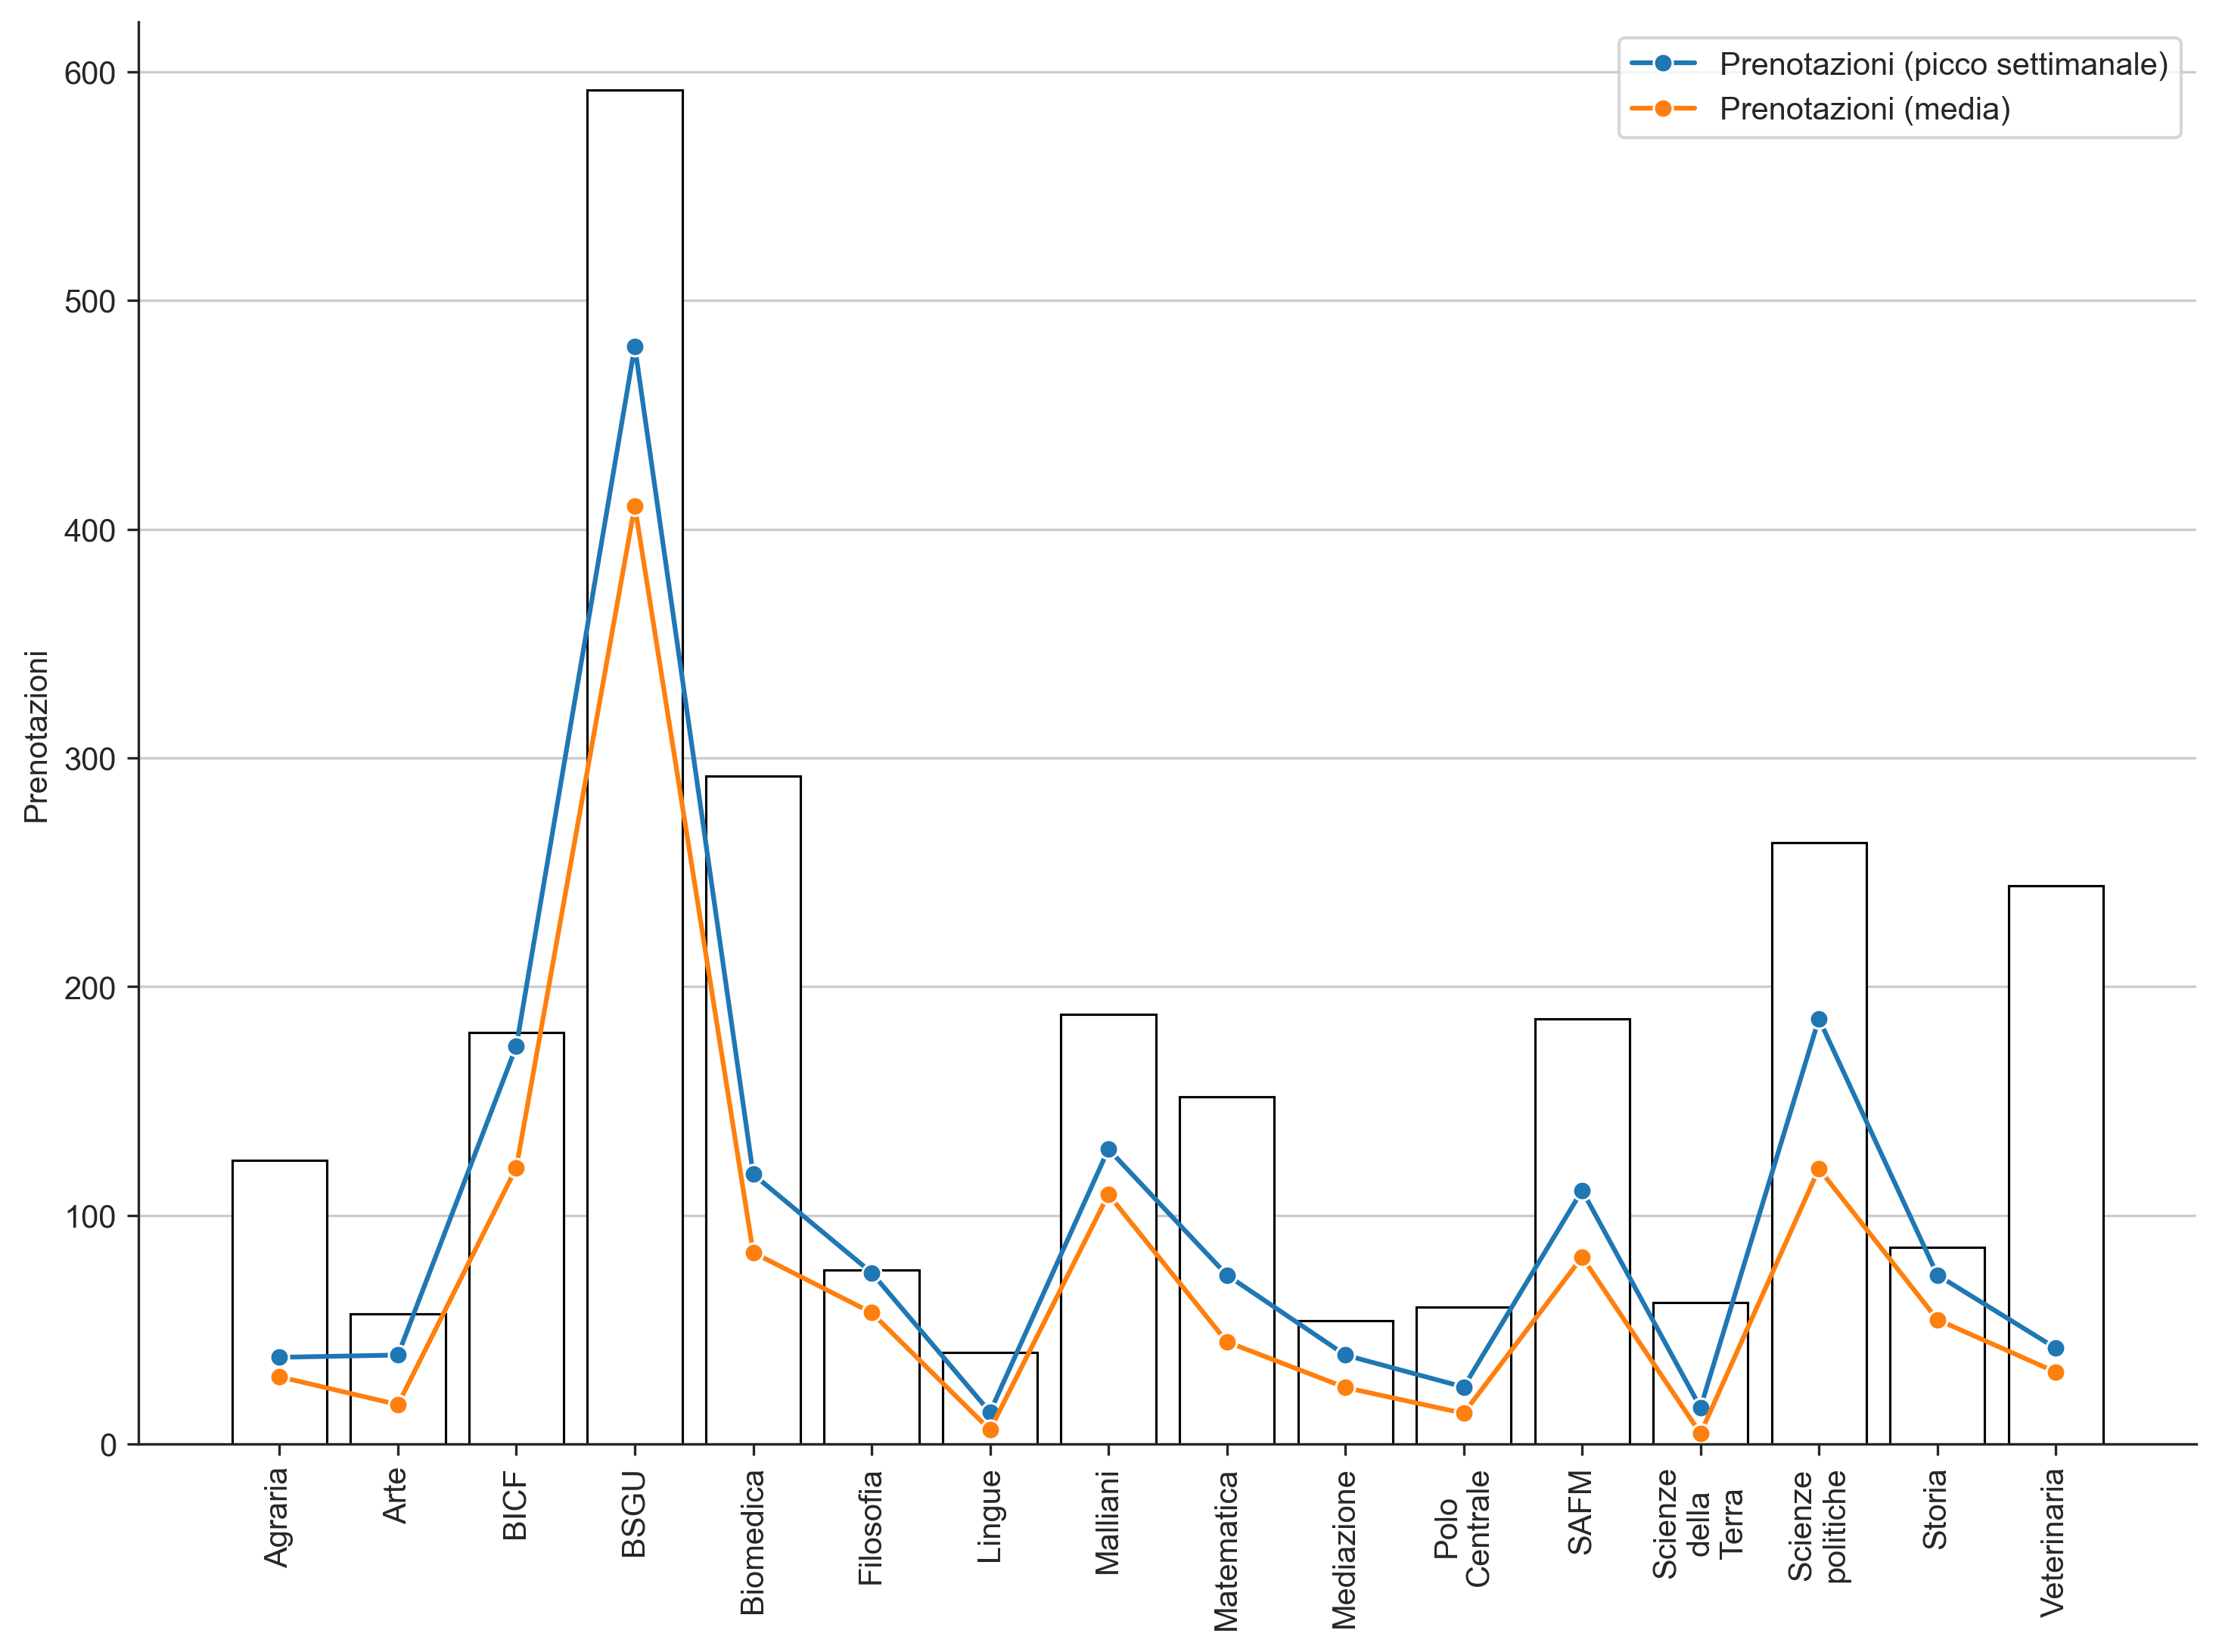

In [29]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (11.7, 8.3), dpi = 300)
sns.set_style("ticks")
sns.barplot(data = dfPST[(dfPST["Biblioteca"] != 'San Paolo') &(dfPST["Settimana"] == settimana)],
    x = "etichetta", y = "Posti", facecolor = 'white', edgecolor = "black", linewidth = 0.75)
sns.lineplot(x = s2.index, y = s2.values, marker = "o", label = "Prenotazioni (picco settimanale)")
sns.lineplot(x = s1.index, y = s1.values, marker = "o", label = "Prenotazioni (media)")
sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Prenotazioni")
plt.savefig("pdf" + "/" + "Prenotazioni " + str(data_iniziale) + " " + str(data_finale) + ".jpg", dpi = 300)
plt.show()

## Tabella

In [10]:
s1 = dfTMP01[(dfTMP01['anno'] == anno) & (dfTMP01['settimana'] == settimana)].groupby(['biblioteca'])['prenotazioni'].mean()

s2 = dfTMP01[(dfTMP01['anno'] == anno) & (dfTMP01['settimana'] == settimana)].groupby(['biblioteca'])['prenotazioni'].max()

s3  = dfPST[(dfPST["Biblioteca"] != 'San Paolo') &(dfPST["Settimana"] == settimana)].groupby(['Biblioteca'])['Posti'].max()

d = {'Posti': s3, 'Prenotazione (media)': s1, 'Prenotazioni (picco)': s2 }
  
dfTMP = pd.DataFrame(d)
  
dfTMP.to_excel('pdf' + "/" + "Easy Planning. Posti disponibili e prenotazioni " + str(data_iniziale) + "-" + str(data_finale) +  ".xlsx",
    index = False)

                     Posti  Prenotazione (media)  Prenotazioni (picco)
Agraria              124.0             29.500000                    38
Arte                  57.0             17.307692                    39
BICF                 180.0            120.952381                   174
BSGU                 592.0            410.266667                   480
Biomedica            292.0             83.800000                   118
Filosofia             76.0             57.500000                    75
Lingue                40.0              6.257576                    14
Malliani             188.0            109.200000                   129
Matematica           152.0             44.777778                    74
Mediazione            54.0             24.800000                    39
Medicina              60.0             13.524272                    25
SAFM                 186.0             81.847222                   111
Scienze della Terra   62.0              4.684932                    16
Scienz

## Documento

In [11]:
from shutil import copyfile

copyfile("pdf" + "/" + "Archivio" + "/" + "PrenotazioniSBA.docx", "pdf" + "/" + "Prenotazioni" + "_" + str(data_iniziale) + "_" + str(data_finale) + ".docx")

'pdf/Prenotazioni_2021-10-25_2021-10-31.docx'

# Prenotazioni evase

In [41]:
import pandas as pd

righe = []

for indice, riga in df.iterrows():
    for elemento in intervalli(lista, inizio(riga['intervallo']), min(fine(riga['intervallo']), riga['orario_di_chiusura'])):
        righe.append([riga['Codice prenotazione'], riga['anno'], riga['settimana'], riga['giorno'], riga['biblioteca'], riga['etichetta'], elemento, riga['Stato gestione']])

dfTMP10 = pd.DataFrame(righe, columns = ['codice_prenotazione', 'anno', 'settimana', 'giorno', 'biblioteca', 'etichetta', 'intervallo', 'stato'])

dfTMP10 = dfTMP10.drop_duplicates(subset = ['codice_prenotazione'])

s10 = dfTMP10[dfTMP10['stato'] == 'evaso'].groupby(['anno', 'settimana', 'giorno', 'biblioteca', 'etichetta', 'stato']).size()

dfTMP11 = s10.to_frame(name = 'prenotazioni')

dfTMP11.reset_index(inplace = True)

In [42]:
s11 = dfTMP11[(dfTMP11['anno'] == anno) & (dfTMP11['settimana'] == settimana)].groupby(['etichetta'])['prenotazioni'].sum()

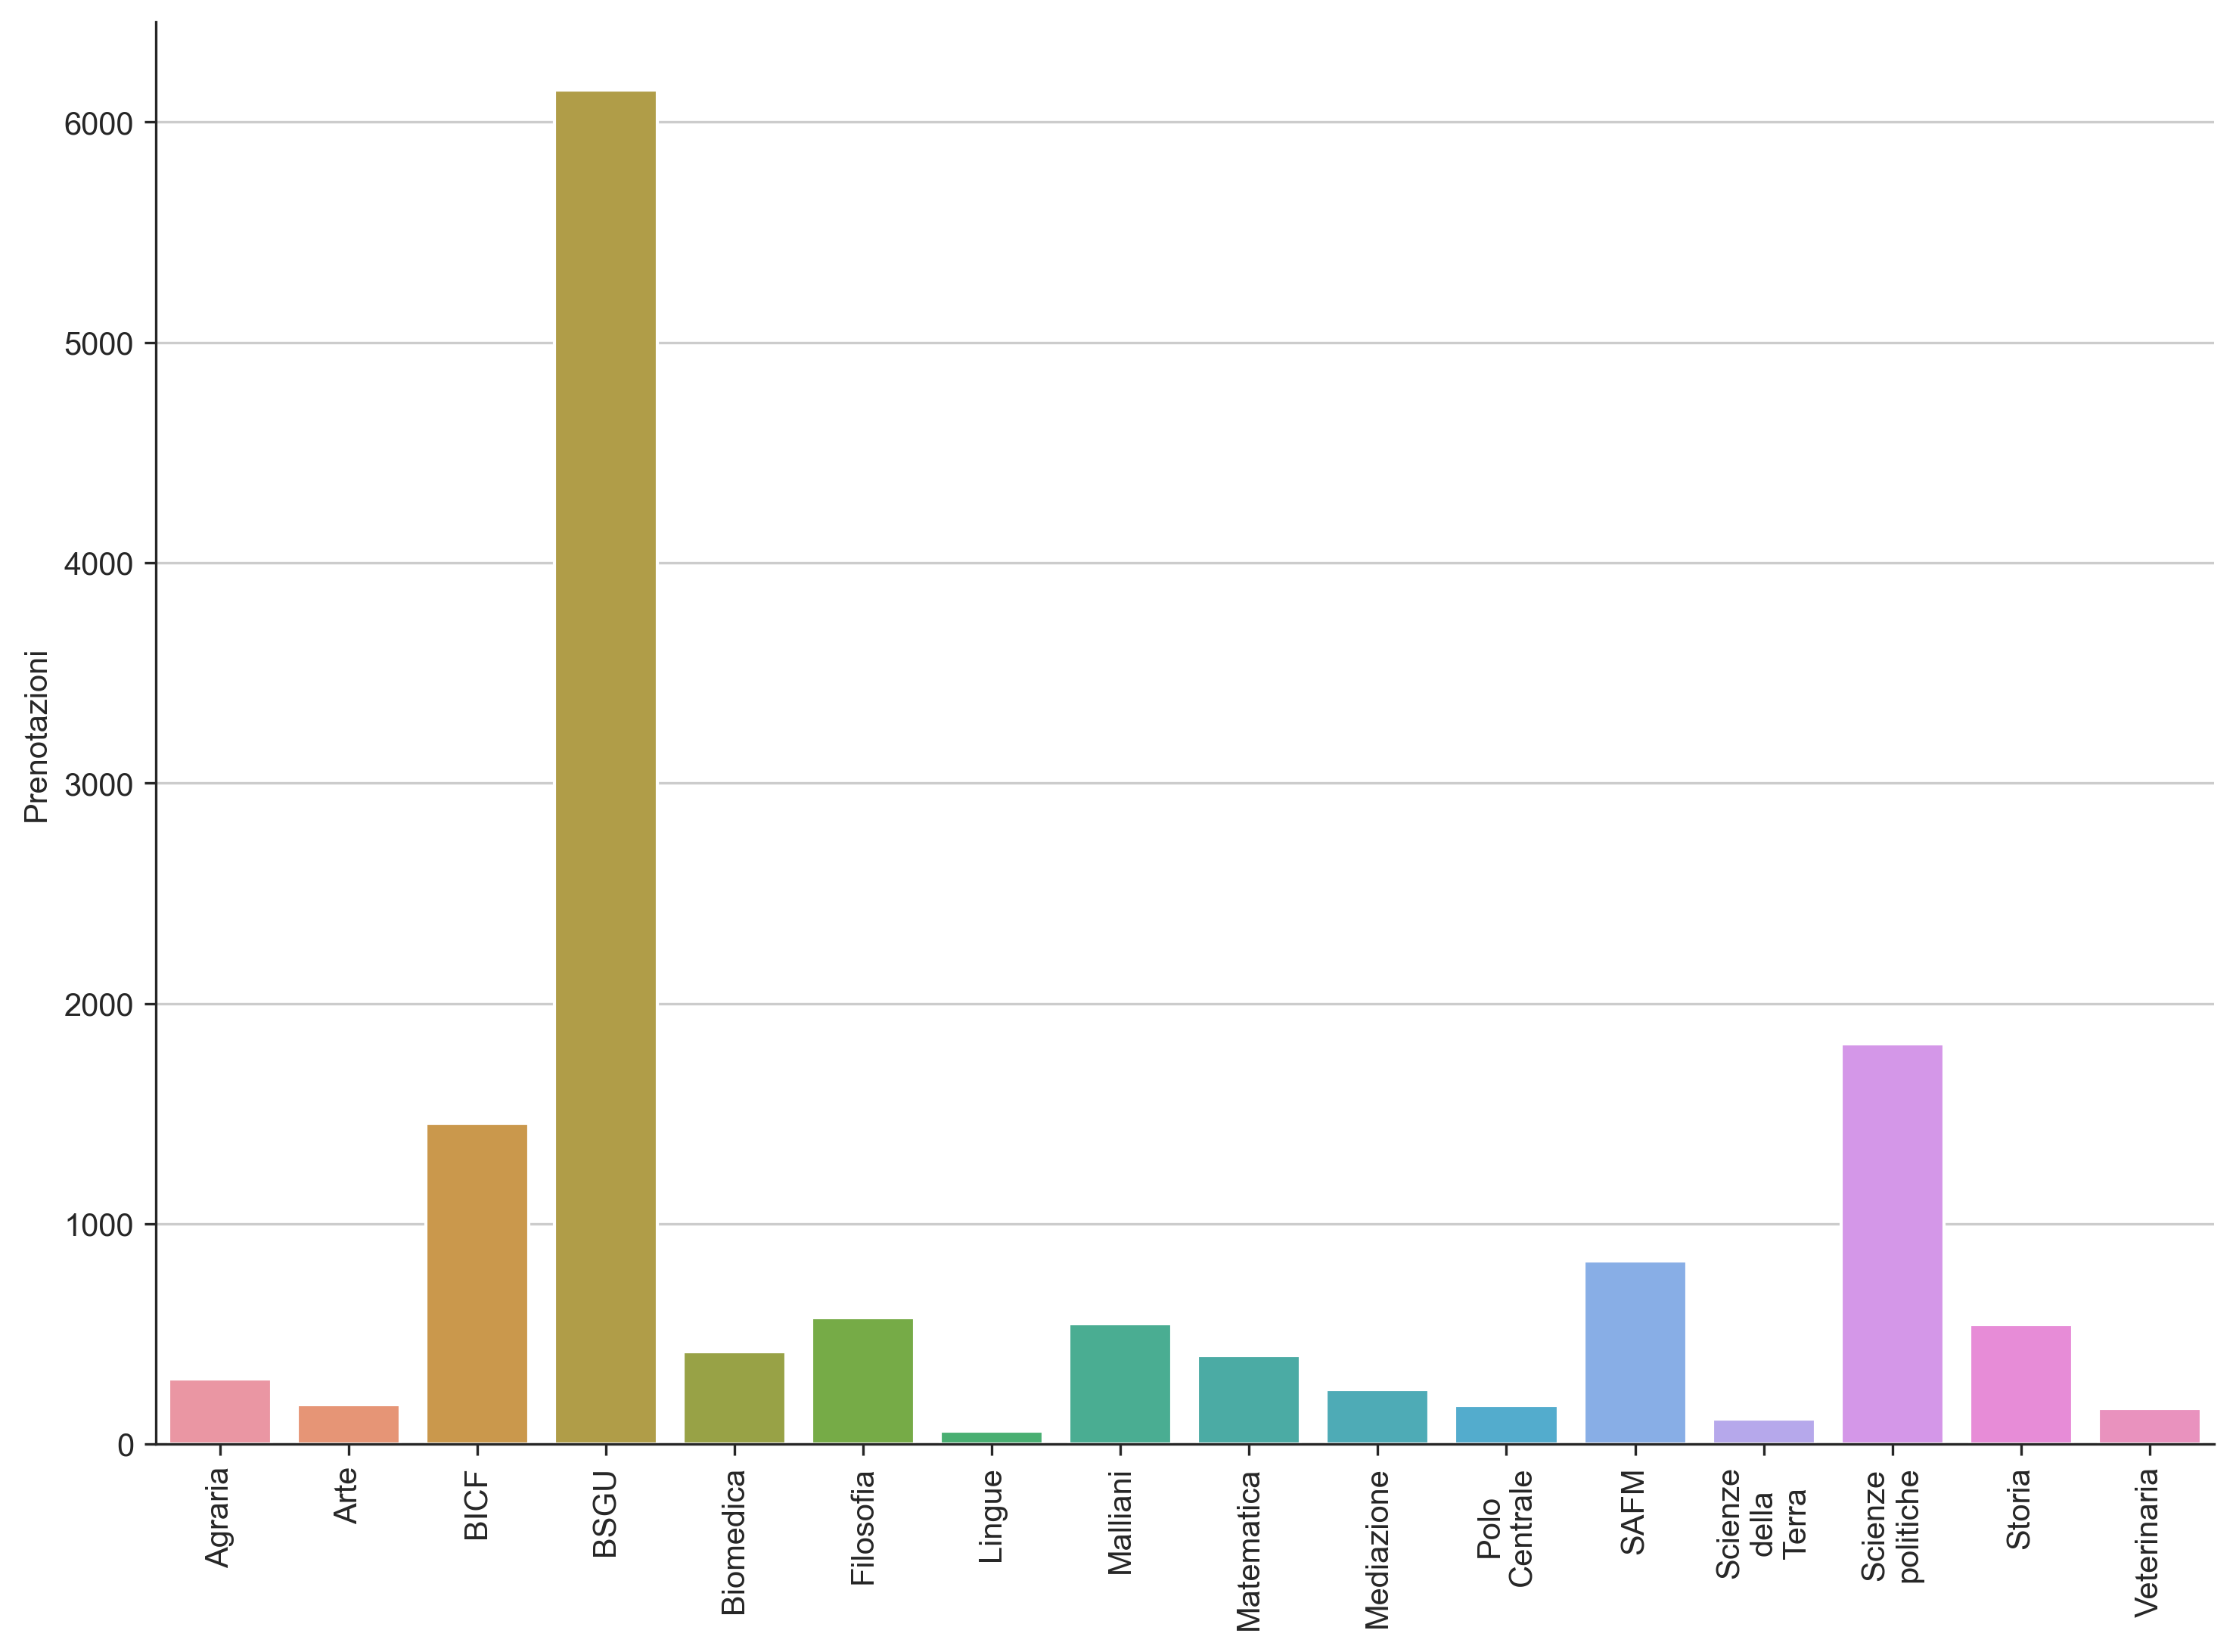

In [43]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (11.7, 8.3), dpi = 300)
sns.set_style("ticks")
sns.barplot(x = s11.index, y = s11.values)
sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Prenotazioni")
# plt.savefig("pdf" + "/" + "Prenotazioni " + str(data_iniziale) + " " + str(data_finale) + ".jpg", dpi = 300)
plt.show()

In [44]:
s11.sum()

13971

# Richiedenti

In [46]:
import pandas as pd

righe = []

for indice, riga in df.iterrows():
    for elemento in intervalli(lista, inizio(riga['intervallo']), min(fine(riga['intervallo']), riga['orario_di_chiusura'])):
        righe.append([riga['Utente'], riga['anno'], riga['settimana'], riga['giorno'], riga['biblioteca'], riga['etichetta'], elemento, riga['Stato gestione']])

dfTMP20 = pd.DataFrame(righe, columns = ['utente', 'anno', 'settimana', 'giorno', 'biblioteca', 'etichetta', 'intervallo', 'stato'])

dfTMP20 = dfTMP20.drop_duplicates(subset = ['utente', 'anno', 'settimana'])

s20 = dfTMP20[dfTMP20['stato'] == 'evaso'].groupby(['anno', 'settimana', 'giorno', 'biblioteca', 'etichetta', 'stato']).size()

dfTMP21 = s.to_frame(name = 'prenotazioni')

dfTMP21.reset_index(inplace = True)

In [47]:
s21 = dfTMP21[(dfTMP21['anno'] == anno) & (dfTMP21['settimana'] == settimana)].groupby(['etichetta'])['prenotazioni'].sum()

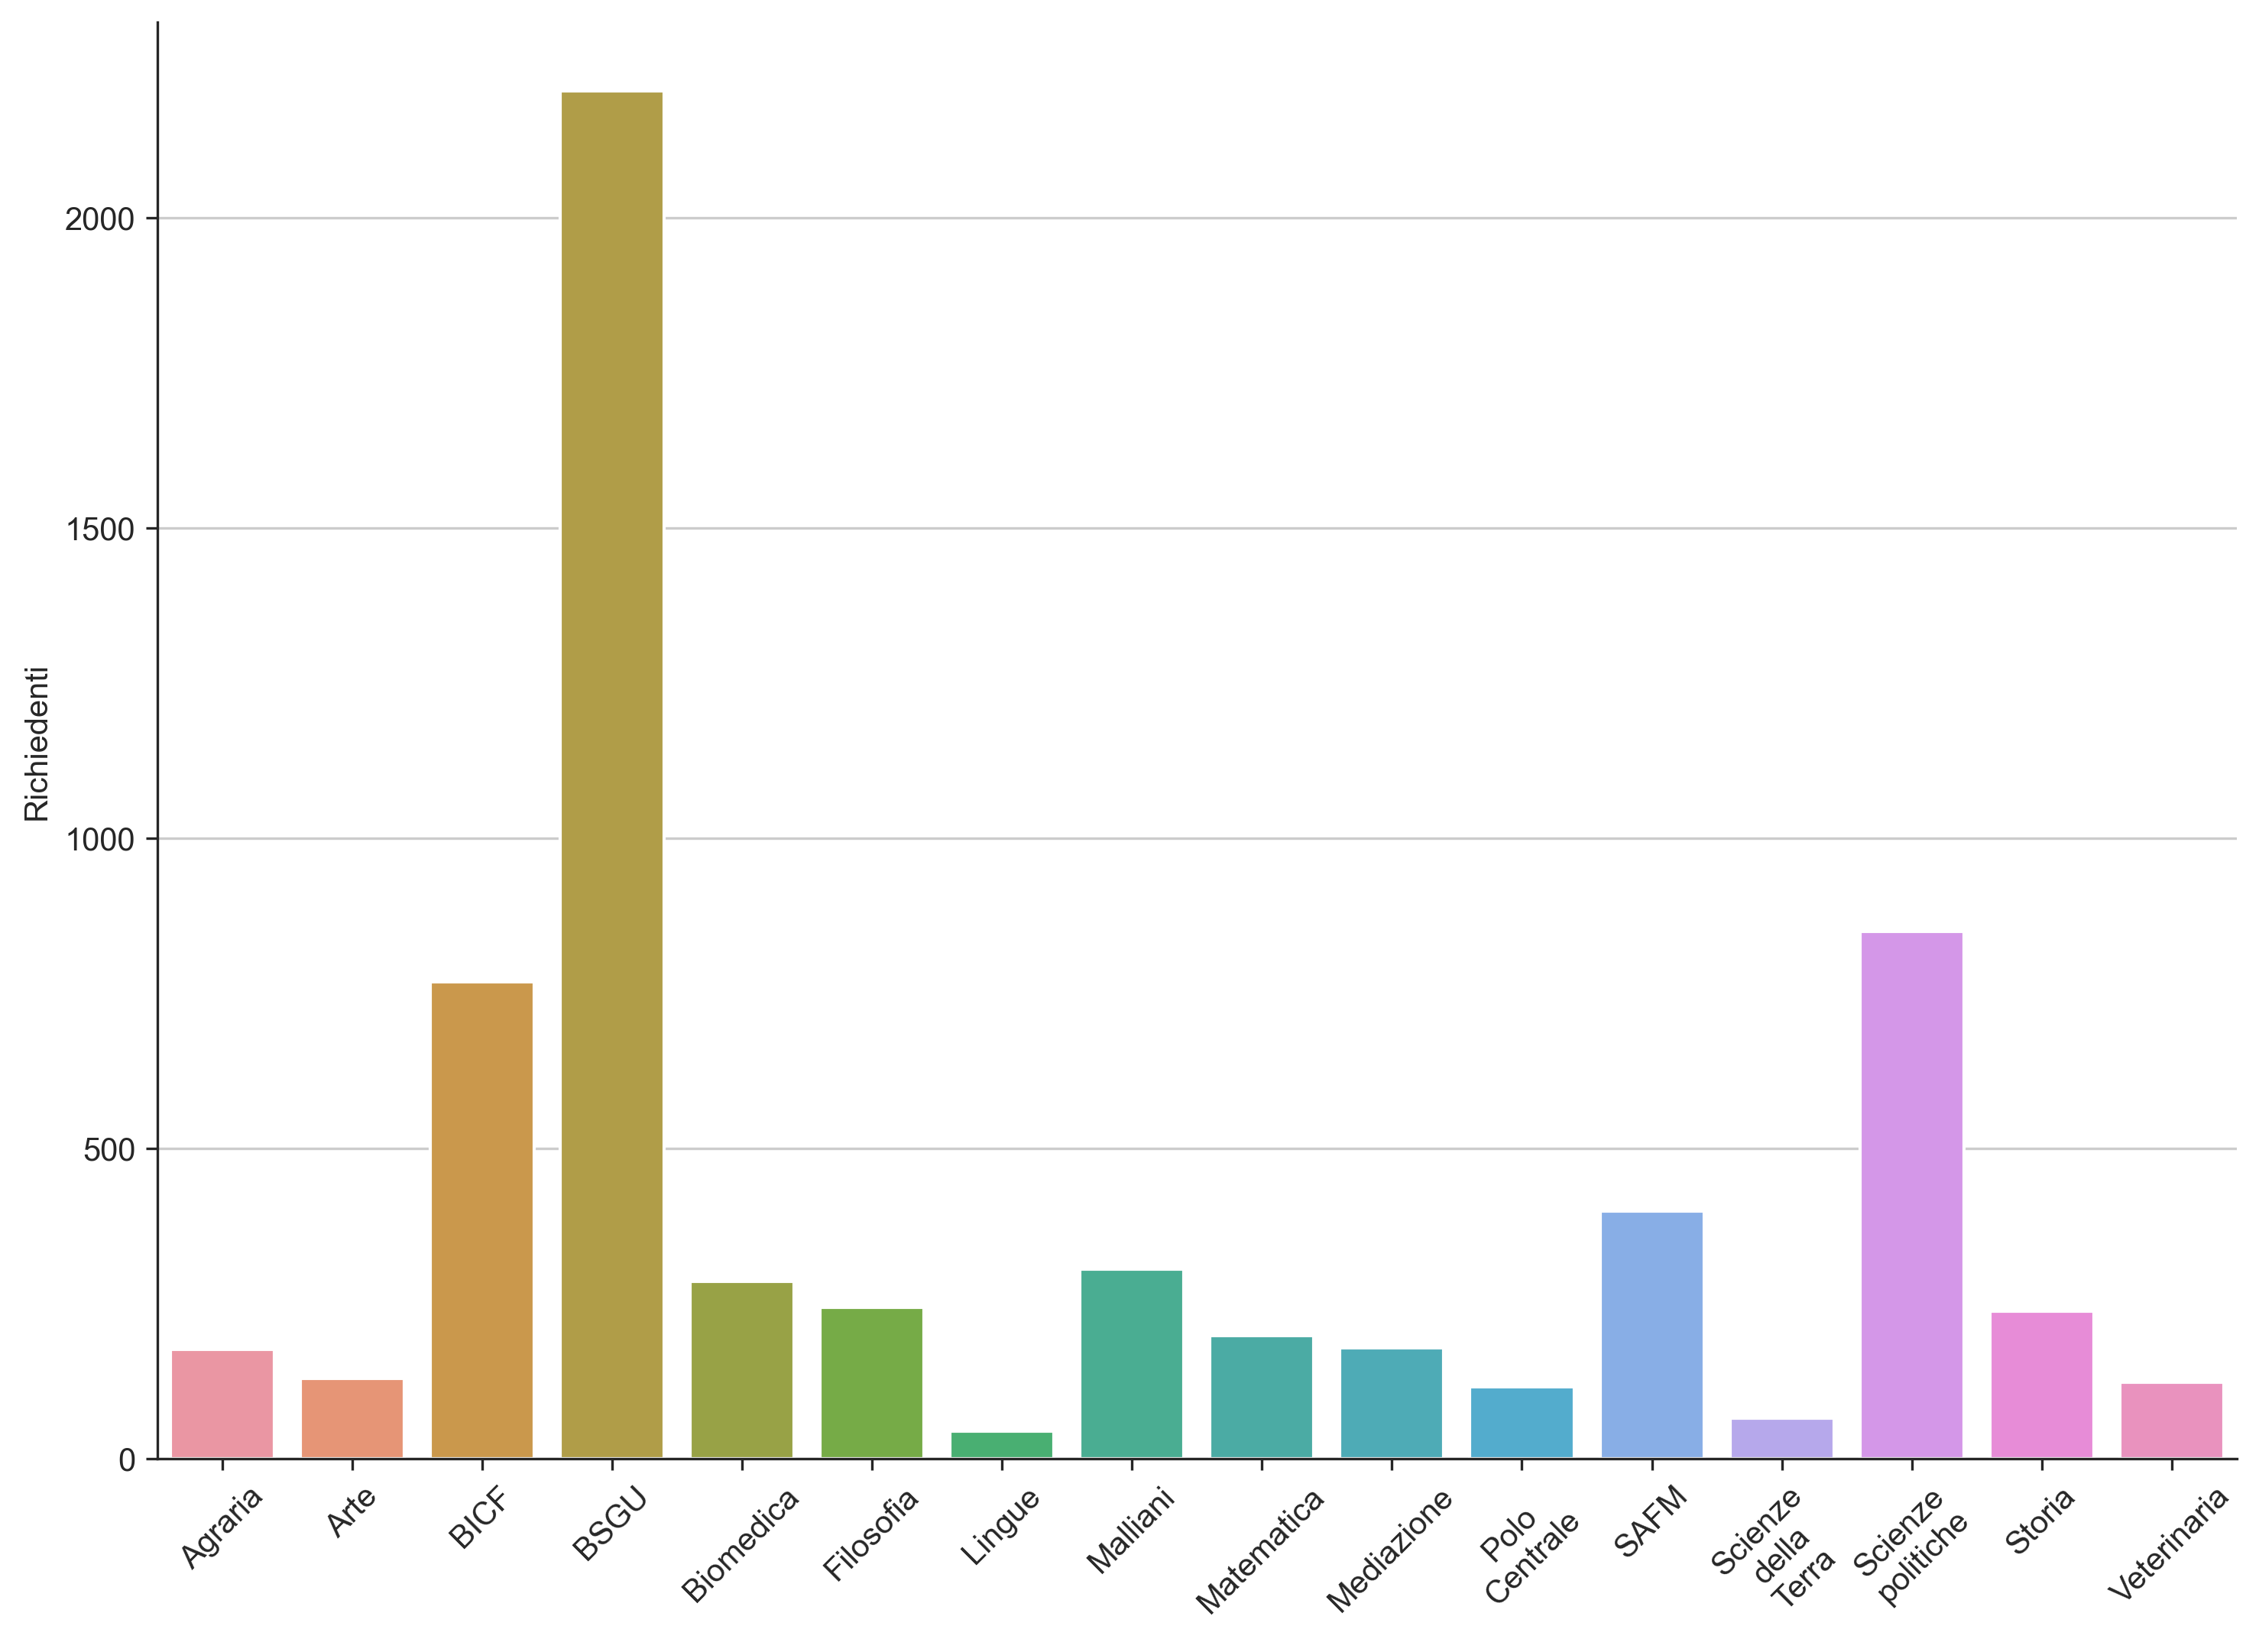

In [60]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (11.7, 8.3), dpi = 300)
sns.set_style("ticks")
sns.barplot(x = s21.index, y = s21.values)
sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.xticks(rotation = 45)
plt.xlabel("")
plt.ylabel("Richiedenti")
# plt.savefig("pdf" + "/" + "Prenotazioni " + str(data_iniziale) + " " + str(data_finale) + ".jpg", dpi = 300)
plt.show()

In [49]:
s21.sum()

6324

# Riepilogo

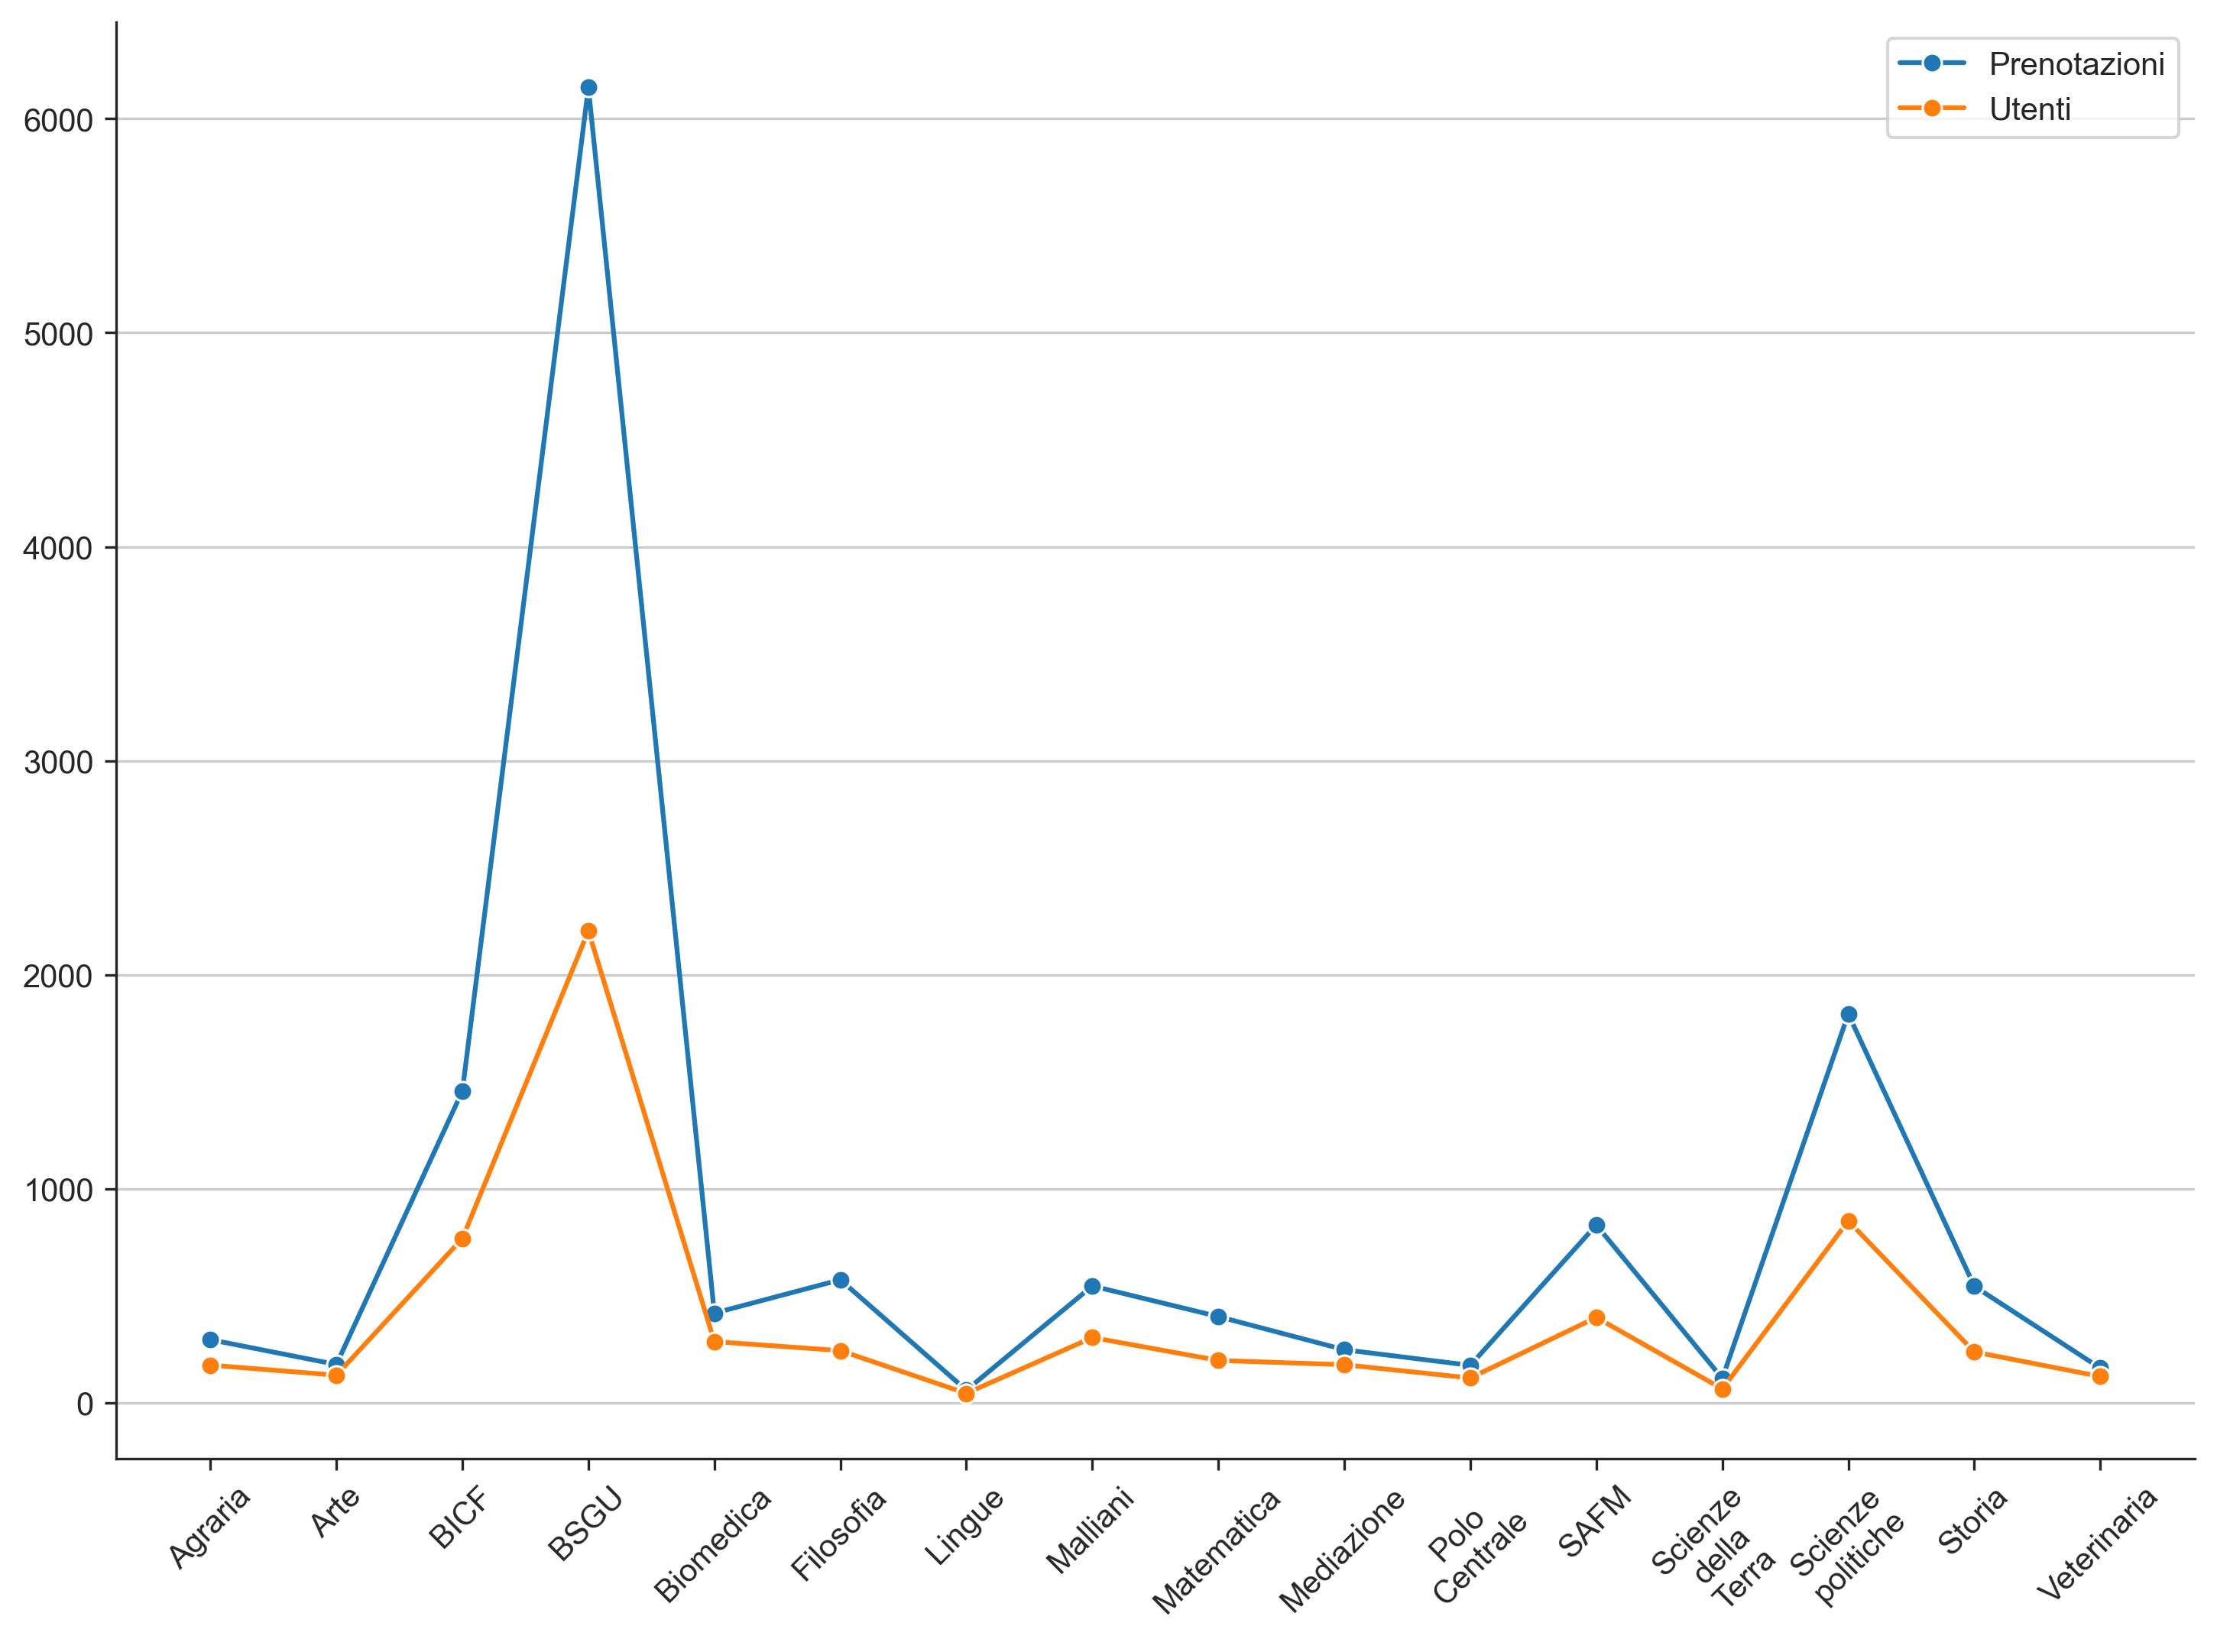

In [61]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (11.7, 8.3), dpi = 300)
sns.set_style("ticks")
sns.lineplot(x = s11.index, y = s11.values, marker = 'o', label = "Prenotazioni")
sns.lineplot(x = s21.index, y = s21.values, marker = 'o', label = "Utenti")
sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.xticks(rotation = 45)
plt.xlabel("")
# plt.ylabel("Richiedenti")
# plt.savefig("pdf" + "/" + "Prenotazioni " + str(data_iniziale) + " " + str(data_finale) + ".jpg", dpi = 300)
plt.show()